Demo of AutoViML auto ML tool on Microsoft malware kaggle dataset

In [1]:
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.683. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.0.47.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [2]:
import pandas as pd

In [3]:
train_df = pd.read_csv(r'C:\MSMalware\train.csv')


#test_df =  pd.read_csv(r'D:\HousePrediction\test.csv')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8921483 entries, 0 to 8921482
Data columns (total 83 columns):
 #   Column                                             Dtype  
---  ------                                             -----  
 0   MachineIdentifier                                  object 
 1   ProductName                                        object 
 2   EngineVersion                                      object 
 3   AppVersion                                         object 
 4   AvSigVersion                                       object 
 5   IsBeta                                             int64  
 6   RtpStateBitfield                                   float64
 7   IsSxsPassiveMode                                   int64  
 8   DefaultBrowsersIdentifier                          float64
 9   AVProductStatesIdentifier                          float64
 10  AVProductsInstalled                                float64
 11  AVProductsEnabled                                 

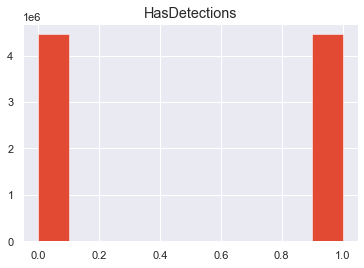

In [5]:
hist = train_df.hist(column='HasDetections')

In [6]:
sampledtrain_df = train_df.sample(frac=0.01, replace=True, random_state=1, ignore_index=True)

In [7]:
sampledtrain_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89215 entries, 0 to 89214
Data columns (total 83 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   MachineIdentifier                                  89215 non-null  object 
 1   ProductName                                        89215 non-null  object 
 2   EngineVersion                                      89215 non-null  object 
 3   AppVersion                                         89215 non-null  object 
 4   AvSigVersion                                       89215 non-null  object 
 5   IsBeta                                             89215 non-null  int64  
 6   RtpStateBitfield                                   88844 non-null  float64
 7   IsSxsPassiveMode                                   89215 non-null  int64  
 8   DefaultBrowsersIdentifier                          4219 non-null   float64
 9   AVProd

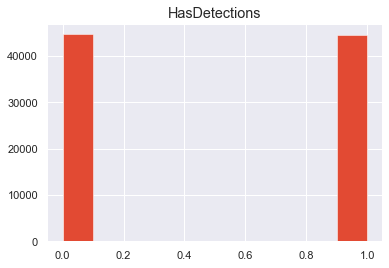

In [8]:
hist =sampledtrain_df.hist('HasDetections')

In [9]:
sampledtrain_df.drop(['MachineIdentifier'],axis=1,inplace=True)

In [10]:
sampledtrain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89215 entries, 0 to 89214
Data columns (total 82 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ProductName                                        89215 non-null  object 
 1   EngineVersion                                      89215 non-null  object 
 2   AppVersion                                         89215 non-null  object 
 3   AvSigVersion                                       89215 non-null  object 
 4   IsBeta                                             89215 non-null  int64  
 5   RtpStateBitfield                                   88844 non-null  float64
 6   IsSxsPassiveMode                                   89215 non-null  int64  
 7   DefaultBrowsersIdentifier                          4219 non-null   float64
 8   AVProductStatesIdentifier                          88854 non-null  float64
 9   AVProd

In [11]:
import gc
del train_df
gc.collect()
train_df = pd.DataFrame()

##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise, Random Forests will take too long for 10,000+ rows
Training Set Shape = (89215, 82)
    Training Set Memory Usage = 55.81 MB
Single_Label Target: ['HasDetections']

################ Binary_Classification VISUALIZATION Started #####################
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
       Class  -> Counts -> Percent
           0:   44677  ->   50.1%
           1:   44538  ->   49.9%
    Target HasDetections is already numeric. No transformation done.
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  25
    Number of Integer-Categorical Columns =  7
    Number of String-Categorical Columns =  17
    Number of Factor-Categorical Columns =  0
    Number of Str

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to C:\Users\Rithesh
[nltk_data]    |     S\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to C:\Users\Rithesh
[nltk_data]    |     S\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to C:\Users\Rithesh
[nltk_data]    |     S\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to C:\Users\Rithesh
[nltk_data]    |     S\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to C:\Users\Rithesh
[nltk_data]    |     S\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_revie

Auto NLP processing on NLP Column: OsBuildLab
Shape of Train Data: 89215 rows
    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for OsBuildLab column
    Faster text processing using clean_tweets function, since top_num_features exceeds 300
Train data Text cleaning completed. Time taken = 57 seconds

For target = HasDetections

    For class = 0
Top 200 n-grams
: ['releasesvcescrow', 'x', 'freth', 'releasesec', 'frewinblueltsbescrow', 'releaseinmarket', 'releasesvc', 'frewinblueltsb', 'frewin', 'sp', 'ldr', 'ldrescrow', 'st', 'releasesvcescrowim', 'releaseinmarketaim', 'frersprereleas', 'frersprereleaseflt', 'gdr', 'frer releasesvcescrow', 'x frer', 'amd freth', 'freth releasesec', 'x freth', 'amd frewinblueltsbescrow', 'frer releaseinmarket', 'freth releas', 'frer releasesvc', 'frewin sp', 'amd frewinblueltsb', 'amd frewin', 'sp ldr', 'sp ldrescrow', 'frer releasesec', 'x frewin', 'freth st', 'frer releasesvcescrowim', 'x frewinblue

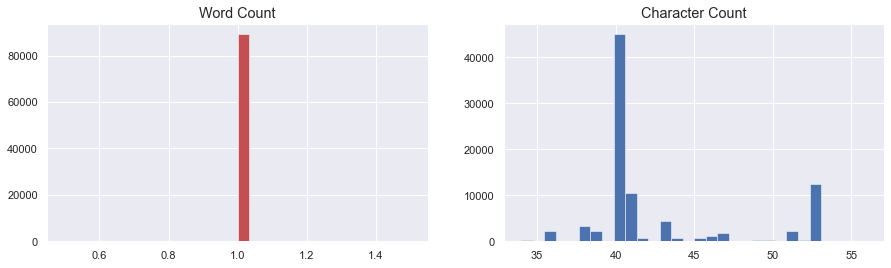

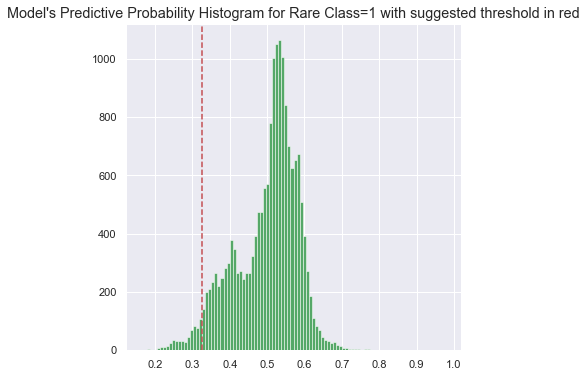

    Using threshold=0.5. However, 0.326 provides better F1=0.67 for rare class...
########################################################
Linear Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 51.4%
Balanced Accuracy = 58.41% with Threshold = 0.50
Confusion Matrix:
[[4332 4603]
 [2820 6088]]
              precision    recall  f1-score   support

           0       0.61      0.48      0.54      8935
           1       0.57      0.68      0.62      8908

    accuracy                           0.58     17843
   macro avg       0.59      0.58      0.58     17843
weighted avg       0.59      0.58      0.58     17843

Balanced Accuracy = 51.49% with Threshold = 0.33
Confusion Matrix:
[[ 441 8494]
 [ 175 8733]]
              precision    recall  f1-score   support

           0       0.72      0.05      0.09      8935
           1       0.51      0.98      0.67      8908

    accuracy                           0.51     17843
   macro avg       0.61      0.51   

After multiple models, Ensemble Model Results:
Binary Class Model Metrics Report
#####################################################
    Accuracy          = 54.0%
    Balanced Accuracy = 54.1%
    Precision         = 52.2%
    Average Precision = 59.9%
    Recall            = 92.3%
    F1 Score          = 66.7%
#####################################################
              precision    recall  f1-score   support

           0       0.67      0.16      0.26      8935
           1       0.52      0.92      0.67      8908

    accuracy                           0.54     17843
   macro avg       0.60      0.54      0.46     17843
weighted avg       0.60      0.54      0.46     17843

[[1416 7519]
 [ 683 8225]]
#############################################################################
Single Model is better than Ensembling Models for this data set.


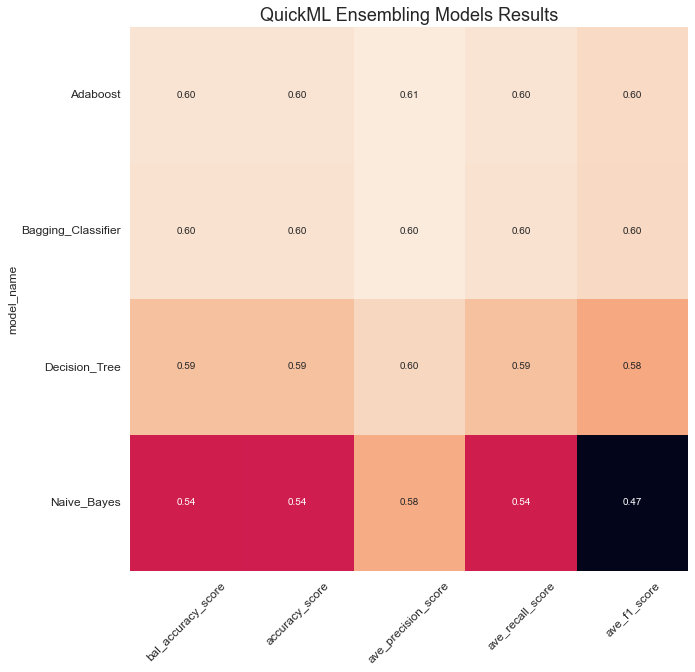

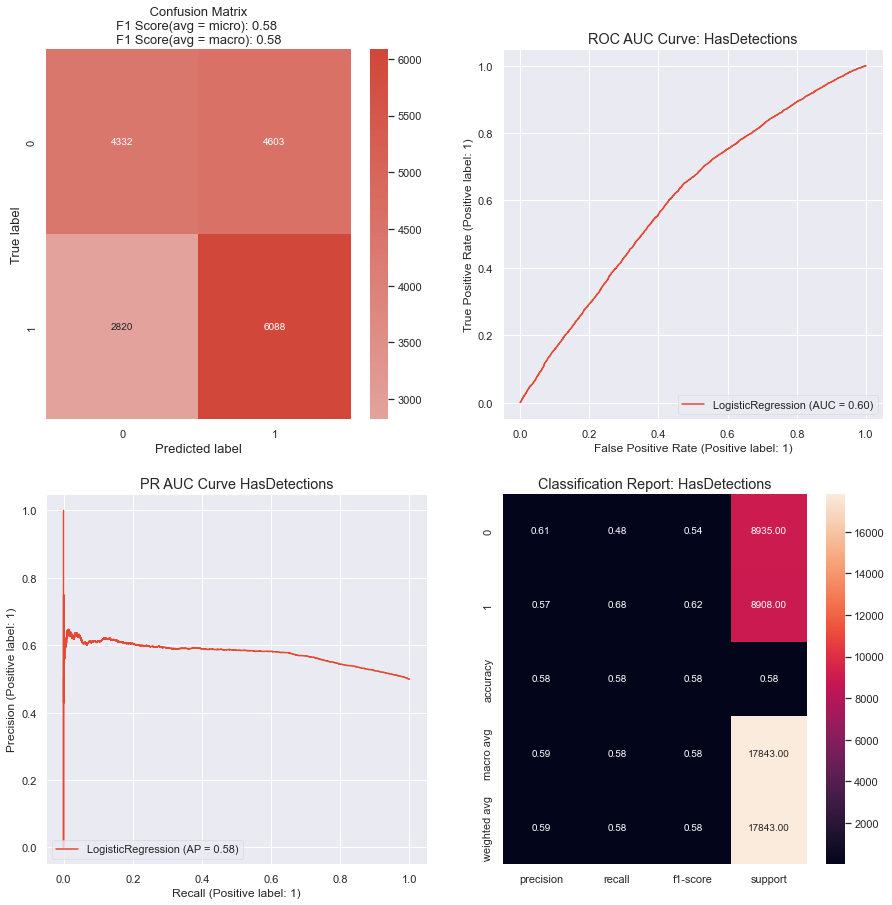

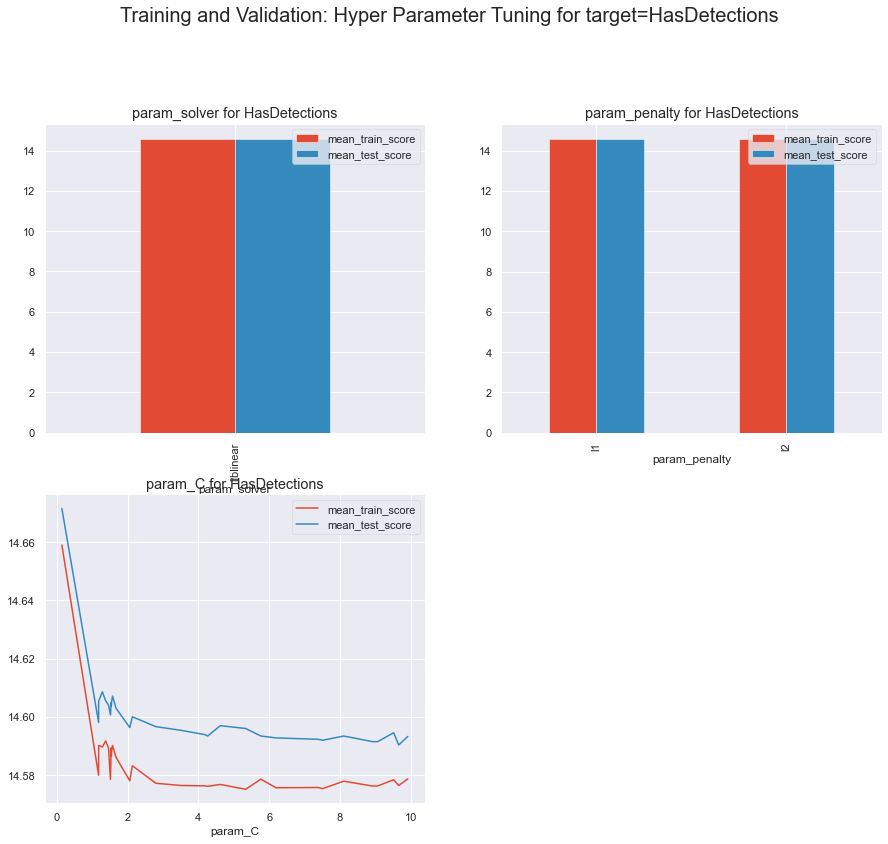

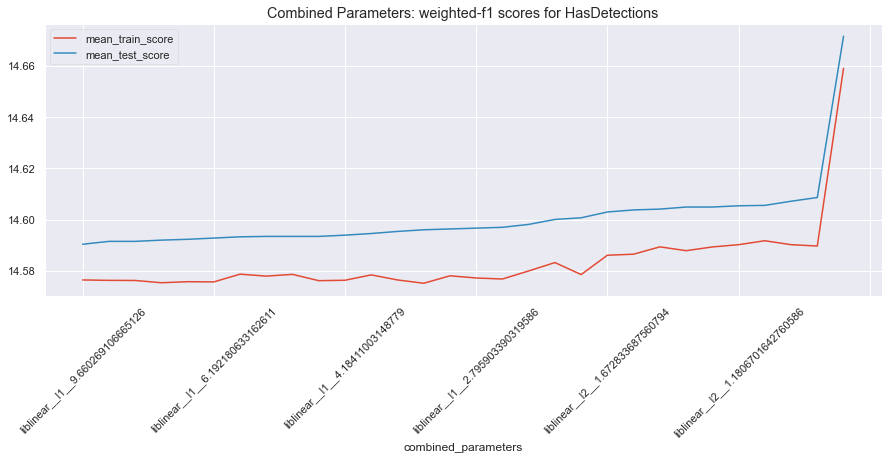

    Time taken for this Target (in seconds) = 320
    Binning_Flag set to False or there are no float vars in data set to be binned
Performing MinMax scaling of train and test data...
#####   T R A I N I N G   M O D E L   O N    F U L L   T R A I N  D A T A  #############
     Actual Training time taken in seconds = 2
Training of models completed. Now starting predictions on test data...
Since there is no Test file, we will do a final prediction on Train itself as return it as testm dataframe
    Making test Data predictions using modified Threshold = 0.326
    Calculating weighted average ensemble of 5 classifiers
    Plotting Feature Importances to explain the output of model
############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 346
Writing Output files to disk...
    Saving predictions to .\HasDetections\HasDetections_Binary_Classification_test_modified.csv
    Saving predictions to .\HasDetections\HasDetectio

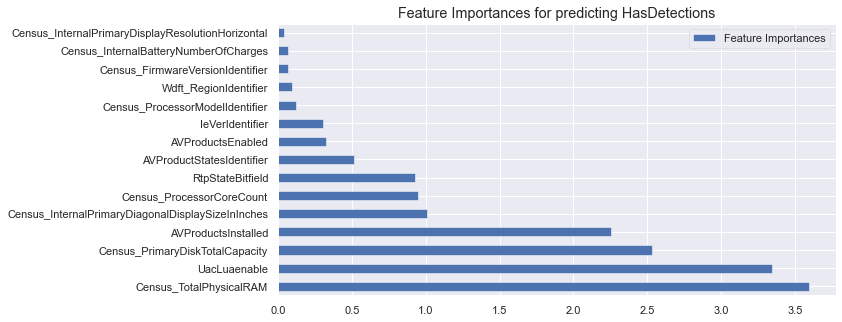

In [12]:
model, features, trainm, testm = Auto_ViML(
    sampledtrain_df,
    target='HasDetections',
    test='',
    sample_submission='',
    hyper_param="RS",
    feature_reduction= True,
    scoring_parameter="weighted-f1",
    KMeans_Featurizer=False,
    Boosting_Flag= None,
    Binning_Flag=False,
    Add_Poly=False,
    Stacking_Flag=False,
    Imbalanced_Flag=False,
    verbose=1,
)

In [13]:
trainm.head(10)

,AVProductsInstalled,AVProductStatesIdentifier,RtpStateBitfield,Census_TotalPhysicalRAM,AVProductsEnabled,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_ProcessorCoreCount,IeVerIdentifier,Census_InternalPrimaryDisplayResolutionHorizontal,Census_PrimaryDiskTotalCapacity,Census_FirmwareManufacturerIdentifier,Wdft_RegionIdentifier,Census_OSInstallLanguageIdentifier,Census_ProcessorModelIdentifier,Census_FirmwareVersionIdentifier,Census_InternalBatteryNumberOfCharges,UacLuaenable,HasDetections
0,1.00,"53,447.00",7.00,"3,072.00",1.00,21.70,2.00,105.00,"1,920.00","476,940.00",809.00,15.00,8.00,375.00,"12,505.00",-1.00,1.00,1
1,1.00,"53,447.00",7.00,"4,096.00",1.00,11.60,4.00,108.00,"1,366.00","122,104.00",628.00,7.00,37.00,"2,327.00","18,211.00",0.00,1.00,1
2,1.00,"53,447.00",7.00,"6,144.00",1.00,13.90,4.00,74.00,"1,366.00","953,869.00",355.00,10.00,9.00,"2,373.00","20,050.00",0.00,1.00,0
3,1.00,"53,447.00",7.00,"8,192.00",1.00,23.10,4.00,137.00,"1,920.00","114,473.00",142.00,15.00,7.00,"2,610.00","52,436.00","4,294,967,295.00",1.00,1
4,2.00,"7,945.00",7.00,"4,096.00",1.00,11.60,4.00,137.00,"1,366.00","114,473.00",554.00,5.00,14.00,"3,392.00","33,075.00",0.00,1.00,1
5,2.00,"43,927.00",7.00,"4,096.00",1.00,18.50,4.00,137.00,"1,366.00","114,473.00",142.00,1.00,8.00,"2,385.00","52,458.00","4,294,967,295.00",1.00,1
6,1.00,"29,199.00",7.00,"2,048.00",1.00,17.20,2.00,335.00,"1,440.00","238,475.00",355.00,10.00,26.00,"4,327.00","19,951.00",-1.00,1.00,1
7,2.00,"46,112.00",7.00,"4,096.00",1.00,15.50,4.00,333.00,"1,366.00","476,940.00",355.00,6.00,25.00,"2,302.00","20,107.00",0.00,1.00,1
8,1.00,"53,447.00",7.00,"4,096.00",1.00,4.00,4.00,137.00,-2.00,"476,940.00",355.00,0.00,8.00,"2,302.00","19,970.00",0.00,1.00,1
9,1.00,"53,447.00",7.00,"8,192.00",1.00,13.90,4.00,117.00,"1,366.00","476,940.00",142.00,1.00,7.00,288.00,"69,552.00",100.00,1.00,0


In [14]:
testm.head(10)

,AVProductsInstalled,AVProductStatesIdentifier,RtpStateBitfield,Census_TotalPhysicalRAM,AVProductsEnabled,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_ProcessorCoreCount,IeVerIdentifier,Census_InternalPrimaryDisplayResolutionHorizontal,Census_PrimaryDiskTotalCapacity,Census_FirmwareManufacturerIdentifier,Wdft_RegionIdentifier,Census_OSInstallLanguageIdentifier,Census_ProcessorModelIdentifier,Census_FirmwareVersionIdentifier,Census_InternalBatteryNumberOfCharges,UacLuaenable,HasDetections_proba_0,HasDetections_proba_1,HasDetections_predictions,HasDetections_Adaboost_predictions,HasDetections_Decision_Tree_predictions,HasDetections_Naive_Bayes_predictions,HasDetections_Bagging_Classifier_predictions,HasDetections_Linear_predictions,HasDetections_Ensembled_predictions
0,0.20,0.76,0.22,0.01,0.40,0.13,0.03,0.24,0.27,0.06,0.74,1.00,0.21,0.08,0.17,0.00,0.04,0.50,0.50,1.00,0,1,1,0,1.00,1
1,0.20,0.76,0.22,0.01,0.40,0.06,0.06,0.25,0.19,0.01,0.57,0.47,0.95,0.52,0.25,0.00,0.04,0.50,0.50,1.00,1,0,1,1,1.00,1
2,0.20,0.76,0.22,0.02,0.40,0.07,0.06,0.17,0.19,0.12,0.32,0.67,0.23,0.53,0.28,0.00,0.04,0.43,0.57,1.00,1,1,1,1,1.00,1
3,0.20,0.76,0.22,0.03,0.40,0.14,0.06,0.32,0.27,0.01,0.12,1.00,0.18,0.58,0.73,1.00,0.04,0.48,0.52,1.00,1,1,1,1,1.00,1
4,0.40,0.11,0.22,0.01,0.40,0.06,0.06,0.32,0.19,0.01,0.51,0.33,0.36,0.76,0.46,0.00,0.04,0.67,0.33,1.00,0,0,0,0,1.00,0
5,0.40,0.62,0.22,0.01,0.40,0.11,0.06,0.32,0.19,0.01,0.12,0.07,0.21,0.53,0.73,1.00,0.04,0.61,0.39,1.00,1,1,1,1,1.00,1
6,0.20,0.41,0.22,0.01,0.40,0.10,0.03,0.78,0.20,0.03,0.32,0.67,0.67,0.97,0.28,0.00,0.04,0.49,0.51,1.00,1,1,1,1,1.00,1
7,0.40,0.65,0.22,0.01,0.40,0.08,0.06,0.78,0.19,0.06,0.32,0.40,0.64,0.51,0.28,0.00,0.04,0.55,0.45,1.00,1,0,1,0,1.00,1
8,0.20,0.76,0.22,0.01,0.40,0.00,0.06,0.32,0.00,0.06,0.32,0.00,0.21,0.51,0.28,0.00,0.04,0.47,0.53,1.00,0,1,1,1,1.00,1
9,0.20,0.76,0.22,0.03,0.40,0.07,0.06,0.27,0.19,0.06,0.12,0.07,0.18,0.06,0.96,0.00,0.04,0.45,0.55,1.00,1,1,1,1,1.00,1


In [15]:
print(features)

['AVProductsInstalled', 'AVProductStatesIdentifier', 'RtpStateBitfield', 'Census_TotalPhysicalRAM', 'AVProductsEnabled', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_ProcessorCoreCount', 'IeVerIdentifier', 'Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_PrimaryDiskTotalCapacity', 'Census_FirmwareManufacturerIdentifier', 'Wdft_RegionIdentifier', 'Census_OSInstallLanguageIdentifier', 'Census_ProcessorModelIdentifier', 'Census_FirmwareVersionIdentifier', 'Census_InternalBatteryNumberOfCharges', 'UacLuaenable']


##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise, Random Forests will take too long for 10,000+ rows
Training Set Shape = (89215, 82)
    Training Set Memory Usage = 55.81 MB
Single_Label Target: ['HasDetections']

################ Binary_Classification VISUALIZATION Started #####################
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
       Class  -> Counts -> Percent
           0:   44677  ->   50.1%
           1:   44538  ->   49.9%
    Target HasDetections is already numeric. No transformation done.
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  25
    Number of Integer-Categorical Columns =  7
    Number of String-Categorical Columns =  17
    Number of Factor-Categorical Columns =  0
    Number of Str

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to C:\Users\Rithesh
[nltk_data]    |     S\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to C:\Users\Rithesh
[nltk_data]    |     S\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to C:\Users\Rithesh
[nltk_data]    |     S\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to C:\Users\Rithesh
[nltk_data]    |     S\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to C:\Users\Rithesh
[nltk_data]    |     S\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_revie

    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for OsBuildLab column
    Faster text processing using clean_tweets function, since top_num_features exceeds 300
Train data Text cleaning completed. Time taken = 40 seconds

For target = HasDetections

    For class = 0
Top 200 n-grams
: ['releasesvcescrow', 'x', 'freth', 'releasesec', 'frewinblueltsbescrow', 'releaseinmarket', 'releasesvc', 'frewinblueltsb', 'frewin', 'sp', 'ldr', 'ldrescrow', 'st', 'releasesvcescrowim', 'releaseinmarketaim', 'frersprereleas', 'frersprereleaseflt', 'gdr', 'frer releasesvcescrow', 'x frer', 'amd freth', 'freth releasesec', 'x freth', 'amd frewinblueltsbescrow', 'frer releaseinmarket', 'freth releas', 'frer releasesvc', 'frewin sp', 'amd frewinblueltsb', 'amd frewin', 'sp ldr', 'sp ldrescrow', 'frer releasesec', 'x frewin', 'freth st', 'frer releasesvcescrowim', 'x frewinblueltsb', 'x frewinblueltsbescrow', 'frer releaseinmarketaim', 'freth releaseinma

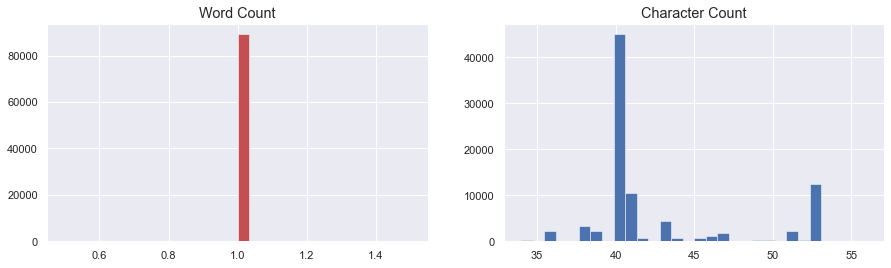

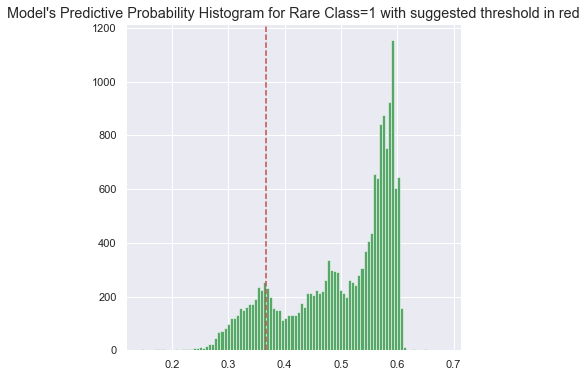

    Using threshold=0.5. However, 0.366 provides better F1=0.67 for rare class...
########################################################
Forests Model Prediction Results on Held Out CV Data Set:
    OOB Score = 0.595
    Regular Accuracy Score = 56.0%
Balanced Accuracy = 59.86% with Threshold = 0.50
Confusion Matrix:
[[4643 4292]
 [2872 6036]]
              precision    recall  f1-score   support

           0       0.62      0.52      0.56      8935
           1       0.58      0.68      0.63      8908

    accuracy                           0.60     17843
   macro avg       0.60      0.60      0.60     17843
weighted avg       0.60      0.60      0.60     17843

Balanced Accuracy = 56.02% with Threshold = 0.37
Confusion Matrix:
[[1832 7103]
 [ 754 8154]]
              precision    recall  f1-score   support

           0       0.71      0.21      0.32      8935
           1       0.53      0.92      0.67      8908

    accuracy                           0.56     17843
   macro avg 

After multiple models, Ensemble Model Results:
Binary Class Model Metrics Report
#####################################################
    Accuracy          = 56.1%
    Balanced Accuracy = 56.1%
    Precision         = 53.5%
    Average Precision = 62.1%
    Recall            = 91.3%
    F1 Score          = 67.5%
#####################################################
              precision    recall  f1-score   support

           0       0.71      0.21      0.32      8935
           1       0.54      0.91      0.67      8908

    accuracy                           0.56     17843
   macro avg       0.62      0.56      0.50     17843
weighted avg       0.62      0.56      0.50     17843

[[1873 7062]
 [ 777 8131]]
#############################################################################
Single Model is better than Ensembling Models for this data set.


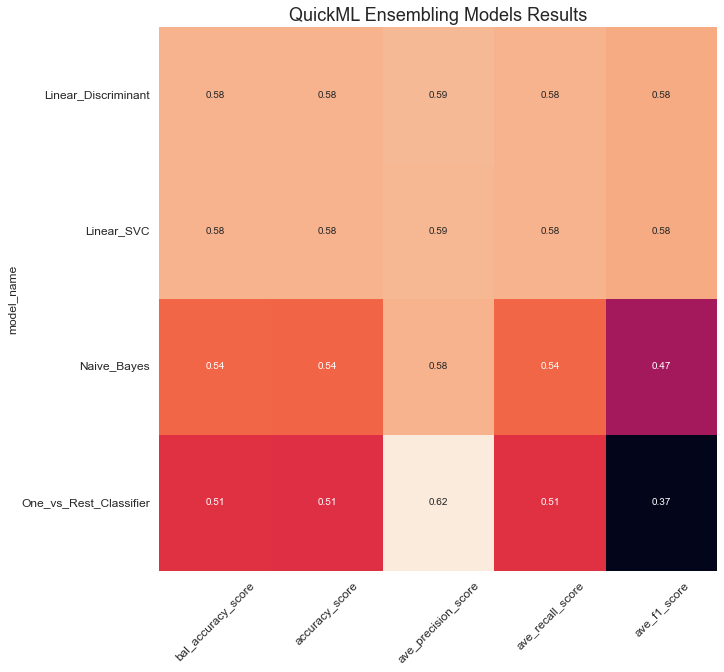

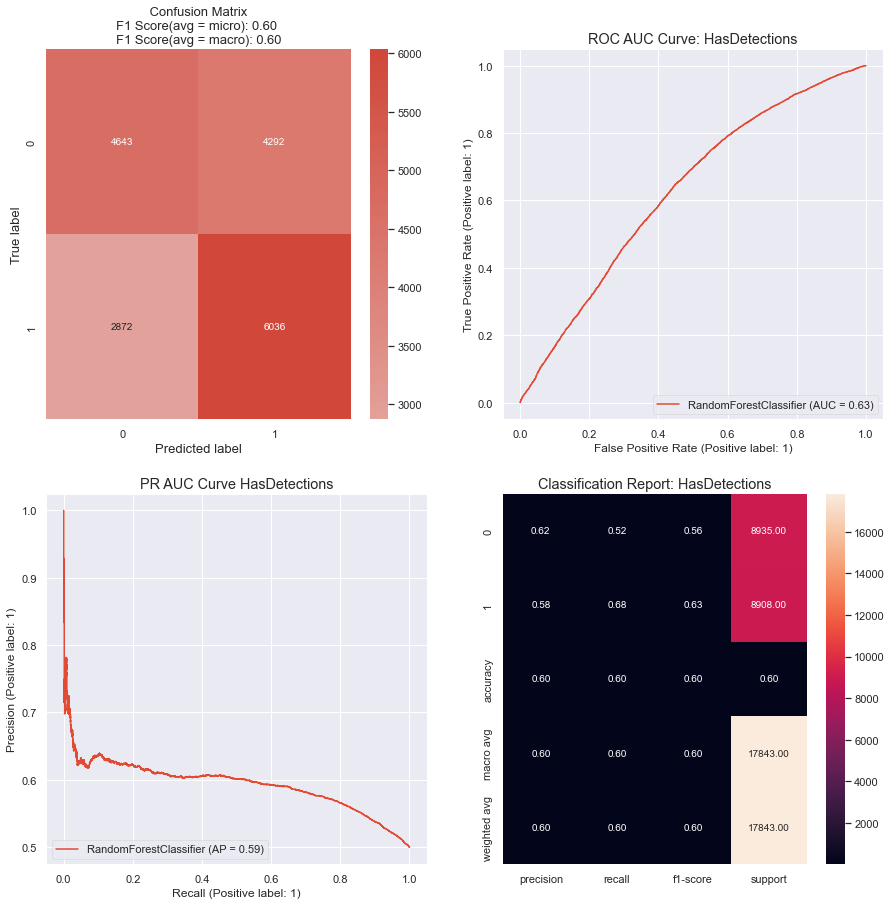

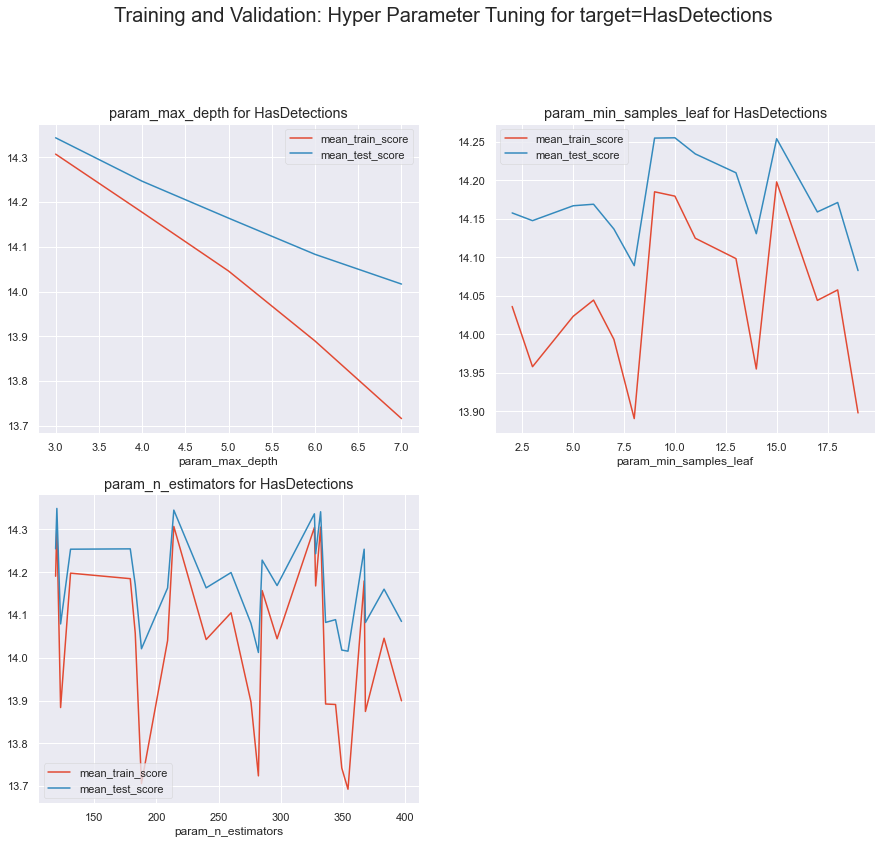

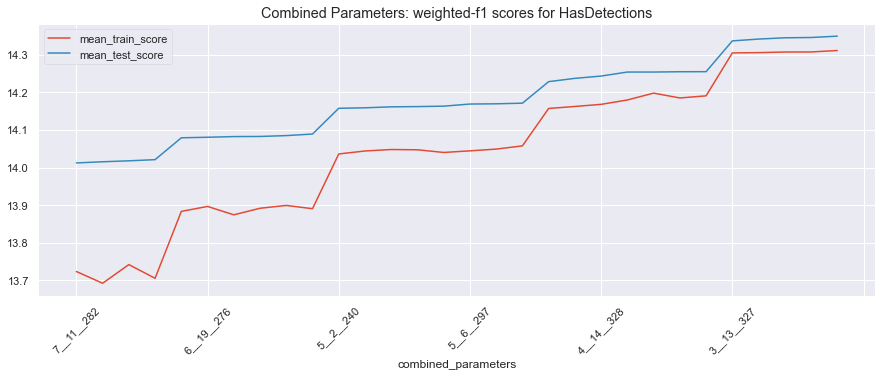

    Time taken for this Target (in seconds) = 746
    Binning_Flag set to False or there are no float vars in data set to be binned
Performing MinMax scaling of train and test data...
#####   T R A I N I N G   M O D E L   O N    F U L L   T R A I N  D A T A  #############
     Actual Training time taken in seconds = 2
Training of models completed. Now starting predictions on test data...
Since there is no Test file, we will do a final prediction on Train itself as return it as testm dataframe
    Making test Data predictions using modified Threshold = 0.366
    Calculating weighted average ensemble of 5 classifiers
    Plotting Feature Importances to explain the output of model
############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 765
Writing Output files to disk...
    Saving predictions to .\HasDetections\HasDetections_Binary_Classification_test_modified.csv
    Saving predictions to .\HasDetections\HasDetectio

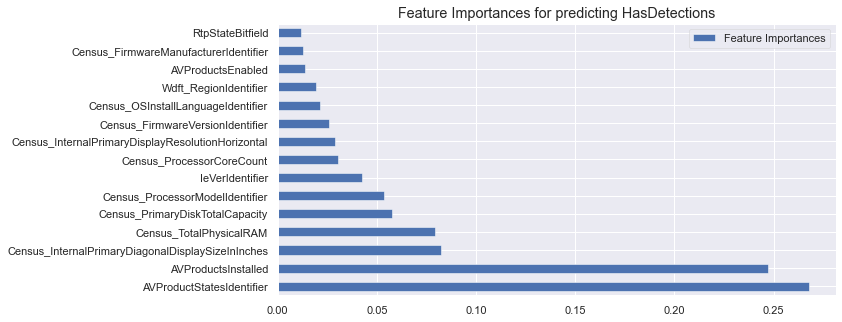

In [16]:
model, features, trainm, testm = Auto_ViML(
    sampledtrain_df,
    target='HasDetections',
    test='',
    sample_submission='',
    hyper_param="RS",
    feature_reduction= True,
    scoring_parameter="weighted-f1",
    KMeans_Featurizer=False,
    Boosting_Flag= False,
    Binning_Flag=False,
    Add_Poly=False,
    Stacking_Flag=False,
    Imbalanced_Flag=False,
    verbose=1,
)

In [17]:
testm.head(10)

,AVProductsInstalled,AVProductStatesIdentifier,RtpStateBitfield,Census_TotalPhysicalRAM,AVProductsEnabled,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_ProcessorCoreCount,IeVerIdentifier,Census_InternalPrimaryDisplayResolutionHorizontal,Census_PrimaryDiskTotalCapacity,Census_FirmwareManufacturerIdentifier,Wdft_RegionIdentifier,Census_OSInstallLanguageIdentifier,Census_ProcessorModelIdentifier,Census_FirmwareVersionIdentifier,Census_InternalBatteryNumberOfCharges,UacLuaenable,HasDetections_proba_0,HasDetections_proba_1,HasDetections_predictions,HasDetections_Linear_Discriminant_predictions,HasDetections_Linear_SVC_predictions,HasDetections_Naive_Bayes_predictions,HasDetections_One_vs_Rest_Classifier_predictions,HasDetections_Forests_predictions,HasDetections_Ensembled_predictions
0,0.20,0.76,0.22,0.01,0.40,0.13,0.03,0.24,0.27,0.06,0.74,1.00,0.21,0.08,0.17,0.00,0.04,0.53,0.47,1.00,1,1,1,1,1.00,1
1,0.20,0.76,0.22,0.01,0.40,0.06,0.06,0.25,0.19,0.01,0.57,0.47,0.95,0.52,0.25,0.00,0.04,0.51,0.49,1.00,1,1,1,1,1.00,1
2,0.20,0.76,0.22,0.02,0.40,0.07,0.06,0.17,0.19,0.12,0.32,0.67,0.23,0.53,0.28,0.00,0.04,0.44,0.56,1.00,1,1,1,1,1.00,1
3,0.20,0.76,0.22,0.03,0.40,0.14,0.06,0.32,0.27,0.01,0.12,1.00,0.18,0.58,0.73,1.00,0.04,0.46,0.54,1.00,1,1,1,1,1.00,1
4,0.40,0.11,0.22,0.01,0.40,0.06,0.06,0.32,0.19,0.01,0.51,0.33,0.36,0.76,0.46,0.00,0.04,0.65,0.35,0.00,0,0,0,1,0.00,0
5,0.40,0.62,0.22,0.01,0.40,0.11,0.06,0.32,0.19,0.01,0.12,0.07,0.21,0.53,0.73,1.00,0.04,0.55,0.45,1.00,0,0,1,1,1.00,1
6,0.20,0.41,0.22,0.01,0.40,0.10,0.03,0.78,0.20,0.03,0.32,0.67,0.67,0.97,0.28,0.00,0.04,0.53,0.47,1.00,1,1,1,1,1.00,1
7,0.40,0.65,0.22,0.01,0.40,0.08,0.06,0.78,0.19,0.06,0.32,0.40,0.64,0.51,0.28,0.00,0.04,0.56,0.44,1.00,0,0,1,1,1.00,1
8,0.20,0.76,0.22,0.01,0.40,0.00,0.06,0.32,0.00,0.06,0.32,0.00,0.21,0.51,0.28,0.00,0.04,0.50,0.50,1.00,1,1,1,1,1.00,1
9,0.20,0.76,0.22,0.03,0.40,0.07,0.06,0.27,0.19,0.06,0.12,0.07,0.18,0.06,0.96,0.00,0.04,0.45,0.55,1.00,1,1,1,1,1.00,1


In [18]:
trainm.head(10)

,AVProductsInstalled,AVProductStatesIdentifier,RtpStateBitfield,Census_TotalPhysicalRAM,AVProductsEnabled,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_ProcessorCoreCount,IeVerIdentifier,Census_InternalPrimaryDisplayResolutionHorizontal,Census_PrimaryDiskTotalCapacity,Census_FirmwareManufacturerIdentifier,Wdft_RegionIdentifier,Census_OSInstallLanguageIdentifier,Census_ProcessorModelIdentifier,Census_FirmwareVersionIdentifier,Census_InternalBatteryNumberOfCharges,UacLuaenable,HasDetections
0,1.00,"53,447.00",7.00,"3,072.00",1.00,21.70,2.00,105.00,"1,920.00","476,940.00",809.00,15.00,8.00,375.00,"12,505.00",-1.00,1.00,1
1,1.00,"53,447.00",7.00,"4,096.00",1.00,11.60,4.00,108.00,"1,366.00","122,104.00",628.00,7.00,37.00,"2,327.00","18,211.00",0.00,1.00,1
2,1.00,"53,447.00",7.00,"6,144.00",1.00,13.90,4.00,74.00,"1,366.00","953,869.00",355.00,10.00,9.00,"2,373.00","20,050.00",0.00,1.00,0
3,1.00,"53,447.00",7.00,"8,192.00",1.00,23.10,4.00,137.00,"1,920.00","114,473.00",142.00,15.00,7.00,"2,610.00","52,436.00","4,294,967,295.00",1.00,1
4,2.00,"7,945.00",7.00,"4,096.00",1.00,11.60,4.00,137.00,"1,366.00","114,473.00",554.00,5.00,14.00,"3,392.00","33,075.00",0.00,1.00,1
5,2.00,"43,927.00",7.00,"4,096.00",1.00,18.50,4.00,137.00,"1,366.00","114,473.00",142.00,1.00,8.00,"2,385.00","52,458.00","4,294,967,295.00",1.00,1
6,1.00,"29,199.00",7.00,"2,048.00",1.00,17.20,2.00,335.00,"1,440.00","238,475.00",355.00,10.00,26.00,"4,327.00","19,951.00",-1.00,1.00,1
7,2.00,"46,112.00",7.00,"4,096.00",1.00,15.50,4.00,333.00,"1,366.00","476,940.00",355.00,6.00,25.00,"2,302.00","20,107.00",0.00,1.00,1
8,1.00,"53,447.00",7.00,"4,096.00",1.00,4.00,4.00,137.00,-2.00,"476,940.00",355.00,0.00,8.00,"2,302.00","19,970.00",0.00,1.00,1
9,1.00,"53,447.00",7.00,"8,192.00",1.00,13.90,4.00,117.00,"1,366.00","476,940.00",142.00,1.00,7.00,288.00,"69,552.00",100.00,1.00,0


In [19]:
print(features)

['AVProductsInstalled', 'AVProductStatesIdentifier', 'RtpStateBitfield', 'Census_TotalPhysicalRAM', 'AVProductsEnabled', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_ProcessorCoreCount', 'IeVerIdentifier', 'Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_PrimaryDiskTotalCapacity', 'Census_FirmwareManufacturerIdentifier', 'Wdft_RegionIdentifier', 'Census_OSInstallLanguageIdentifier', 'Census_ProcessorModelIdentifier', 'Census_FirmwareVersionIdentifier', 'Census_InternalBatteryNumberOfCharges', 'UacLuaenable']


##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise XGBoost will take too long for 10,000+ rows.
Training Set Shape = (89215, 82)
    Training Set Memory Usage = 55.81 MB
Single_Label Target: ['HasDetections']

################ Binary_Classification VISUALIZATION Started #####################
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
       Class  -> Counts -> Percent
           0:   44677  ->   50.1%
           1:   44538  ->   49.9%
    Target HasDetections is already numeric. No transformation done.
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  25
    Number of Integer-Categorical Columns =  7
    Number of String-Categorical Columns =  17
    Number of Factor-Categorical Columns =  0
    Number of String-Boo

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to C:\Users\Rithesh
[nltk_data]    |     S\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to C:\Users\Rithesh
[nltk_data]    |     S\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to C:\Users\Rithesh
[nltk_data]    |     S\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to C:\Users\Rithesh
[nltk_data]    |     S\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to C:\Users\Rithesh
[nltk_data]    |     S\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_revie

    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for OsBuildLab column
    Faster text processing using clean_tweets function, since top_num_features exceeds 300
Train data Text cleaning completed. Time taken = 40 seconds

For target = HasDetections

    For class = 0
Top 200 n-grams
: ['releasesvcescrow', 'x', 'freth', 'releasesec', 'frewinblueltsbescrow', 'releaseinmarket', 'releasesvc', 'frewinblueltsb', 'frewin', 'sp', 'ldr', 'ldrescrow', 'st', 'releasesvcescrowim', 'releaseinmarketaim', 'frersprereleas', 'frersprereleaseflt', 'gdr', 'frer releasesvcescrow', 'x frer', 'amd freth', 'freth releasesec', 'x freth', 'amd frewinblueltsbescrow', 'frer releaseinmarket', 'freth releas', 'frer releasesvc', 'frewin sp', 'amd frewinblueltsb', 'amd frewin', 'sp ldr', 'sp ldrescrow', 'frer releasesec', 'x frewin', 'freth st', 'frer releasesvcescrowim', 'x frewinblueltsb', 'x frewinblueltsbescrow', 'frer releaseinmarketaim', 'freth releaseinma

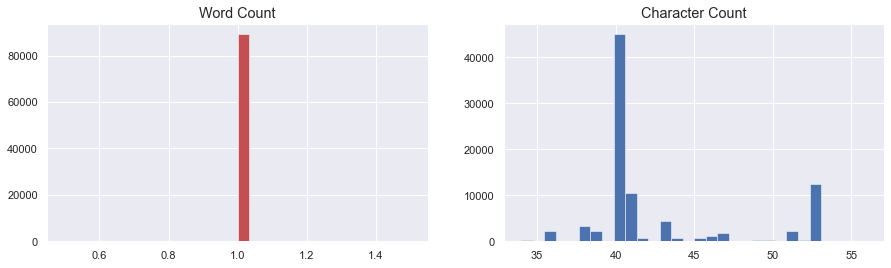

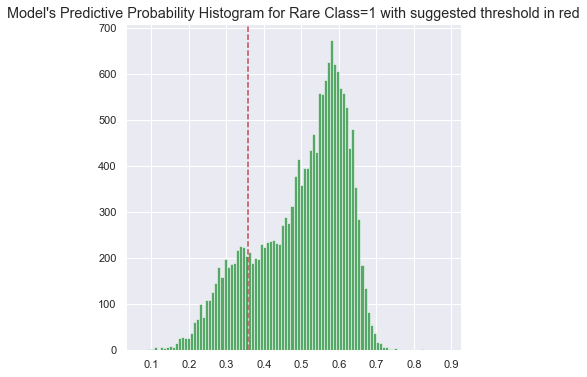

    Using threshold=0.5. However, 0.358 provides better F1=0.68 for rare class...
########################################################
XGBoost Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 57.2%
Balanced Accuracy = 60.54% with Threshold = 0.50
Confusion Matrix:
[[4724 4211]
 [2832 6076]]
              precision    recall  f1-score   support

           0       0.63      0.53      0.57      8935
           1       0.59      0.68      0.63      8908

    accuracy                           0.61     17843
   macro avg       0.61      0.61      0.60     17843
weighted avg       0.61      0.61      0.60     17843

Balanced Accuracy = 57.24% with Threshold = 0.36
Confusion Matrix:
[[2138 6797]
 [ 842 8066]]
              precision    recall  f1-score   support

           0       0.72      0.24      0.36      8935
           1       0.54      0.91      0.68      8908

    accuracy                           0.57     17843
   macro avg       0.63      0.57  

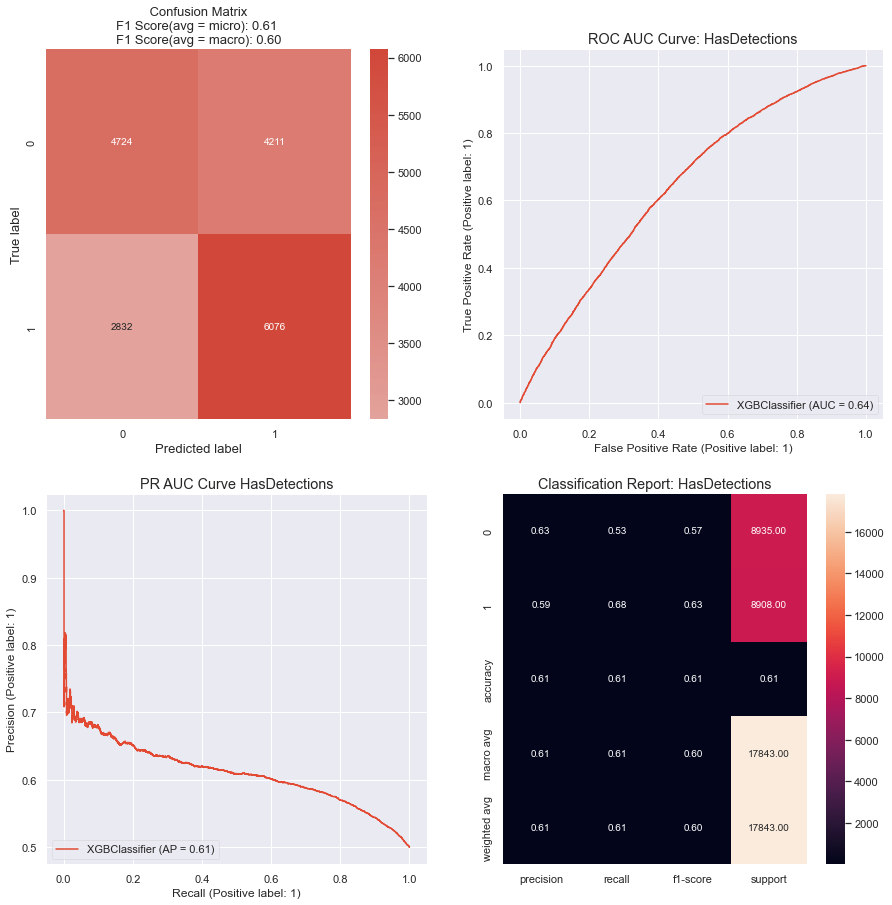

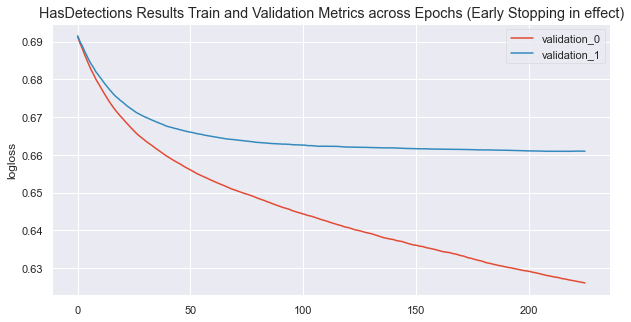

    Time taken for this Target (in seconds) = 302
    Binning_Flag set to False or there are no float vars in data set to be binned
CAUTION: Stacking can produce Highly Overfit models on Training Data...
    Time taken for Stacking: 1.0 seconds
    Adding 2 Stacking feature(s) to training data
Performing MinMax scaling of train and test data...
#####   T R A I N I N G   M O D E L   O N    F U L L   T R A I N  D A T A  #############
     Actual Training time taken in seconds = 14
Training of models completed. Now starting predictions on test data...
Since there is no Test file, we will do a final prediction on Train itself as return it as testm dataframe
    Making test Data predictions using modified Threshold = 0.358
    Time taken for Stacking: 0.2 seconds
    Plotting Feature Importances to explain the output of model
############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 319
Writing Output files to disk...
   

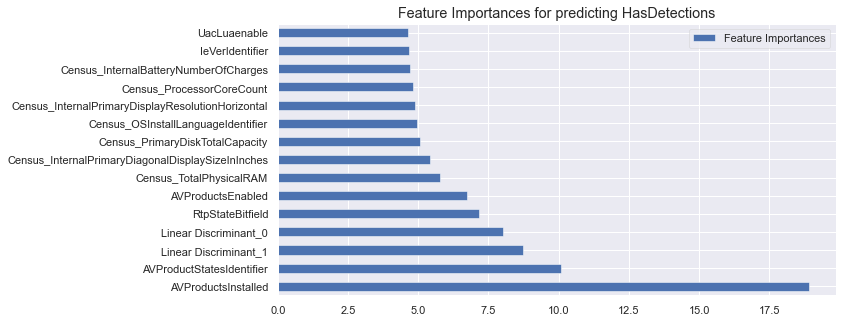

In [20]:
model, features, trainm, testm = Auto_ViML(
    sampledtrain_df,
    target='HasDetections',
    test='',
    sample_submission='',
    hyper_param="RS",
    feature_reduction= True,
    scoring_parameter="weighted-f1",
    KMeans_Featurizer=False,
    Boosting_Flag= True,
    Binning_Flag=False,
    Add_Poly=False,
    Stacking_Flag=True,
    Imbalanced_Flag=False,
    verbose=1,
)

In [21]:
print(features)

['AVProductsInstalled', 'AVProductStatesIdentifier', 'RtpStateBitfield', 'Census_TotalPhysicalRAM', 'AVProductsEnabled', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_ProcessorCoreCount', 'IeVerIdentifier', 'Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_PrimaryDiskTotalCapacity', 'Census_FirmwareManufacturerIdentifier', 'Wdft_RegionIdentifier', 'Census_OSInstallLanguageIdentifier', 'Census_ProcessorModelIdentifier', 'Census_FirmwareVersionIdentifier', 'Census_InternalBatteryNumberOfCharges', 'UacLuaenable', 'Linear Discriminant_0', 'Linear Discriminant_1']


In [22]:
trainm.head(10)

,AVProductsInstalled,AVProductStatesIdentifier,RtpStateBitfield,Census_TotalPhysicalRAM,AVProductsEnabled,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_ProcessorCoreCount,IeVerIdentifier,Census_InternalPrimaryDisplayResolutionHorizontal,Census_PrimaryDiskTotalCapacity,Census_FirmwareManufacturerIdentifier,Wdft_RegionIdentifier,Census_OSInstallLanguageIdentifier,Census_ProcessorModelIdentifier,Census_FirmwareVersionIdentifier,Census_InternalBatteryNumberOfCharges,UacLuaenable,HasDetections,Linear Discriminant_0,Linear Discriminant_1
0,1.00,"53,447.00",7.00,"3,072.00",1.00,21.70,2.00,105.00,"1,920.00","476,940.00",809.00,15.00,8.00,375.00,"12,505.00",-1.00,1.00,1,0.49,0.51
1,1.00,"53,447.00",7.00,"4,096.00",1.00,11.60,4.00,108.00,"1,366.00","122,104.00",628.00,7.00,37.00,"2,327.00","18,211.00",0.00,1.00,1,0.50,0.50
2,1.00,"53,447.00",7.00,"6,144.00",1.00,13.90,4.00,74.00,"1,366.00","953,869.00",355.00,10.00,9.00,"2,373.00","20,050.00",0.00,1.00,0,0.43,0.57
3,1.00,"53,447.00",7.00,"8,192.00",1.00,23.10,4.00,137.00,"1,920.00","114,473.00",142.00,15.00,7.00,"2,610.00","52,436.00","4,294,967,295.00",1.00,1,0.49,0.51
4,2.00,"7,945.00",7.00,"4,096.00",1.00,11.60,4.00,137.00,"1,366.00","114,473.00",554.00,5.00,14.00,"3,392.00","33,075.00",0.00,1.00,1,0.67,0.33
5,2.00,"43,927.00",7.00,"4,096.00",1.00,18.50,4.00,137.00,"1,366.00","114,473.00",142.00,1.00,8.00,"2,385.00","52,458.00","4,294,967,295.00",1.00,1,0.61,0.39
6,1.00,"29,199.00",7.00,"2,048.00",1.00,17.20,2.00,335.00,"1,440.00","238,475.00",355.00,10.00,26.00,"4,327.00","19,951.00",-1.00,1.00,1,0.48,0.52
7,2.00,"46,112.00",7.00,"4,096.00",1.00,15.50,4.00,333.00,"1,366.00","476,940.00",355.00,6.00,25.00,"2,302.00","20,107.00",0.00,1.00,1,0.55,0.45
8,1.00,"53,447.00",7.00,"4,096.00",1.00,4.00,4.00,137.00,-2.00,"476,940.00",355.00,0.00,8.00,"2,302.00","19,970.00",0.00,1.00,1,0.47,0.53
9,1.00,"53,447.00",7.00,"8,192.00",1.00,13.90,4.00,117.00,"1,366.00","476,940.00",142.00,1.00,7.00,288.00,"69,552.00",100.00,1.00,0,0.45,0.55


In [23]:
testm.head(10)

,AVProductsInstalled,AVProductStatesIdentifier,RtpStateBitfield,Census_TotalPhysicalRAM,AVProductsEnabled,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_ProcessorCoreCount,IeVerIdentifier,Census_InternalPrimaryDisplayResolutionHorizontal,Census_PrimaryDiskTotalCapacity,Census_FirmwareManufacturerIdentifier,Wdft_RegionIdentifier,Census_OSInstallLanguageIdentifier,Census_ProcessorModelIdentifier,Census_FirmwareVersionIdentifier,Census_InternalBatteryNumberOfCharges,UacLuaenable,Linear Discriminant_0,Linear Discriminant_1,HasDetections_proba_0,HasDetections_proba_1,HasDetections_predictions,HasDetections_Stacked_Linear Discriminant_predictions
0,0.20,0.76,0.22,0.01,0.40,0.13,0.03,0.24,0.27,0.06,0.74,1.00,0.21,0.08,0.17,0.00,0.04,0.53,0.47,0.48,0.52,1.00,1
1,0.20,0.76,0.22,0.01,0.40,0.06,0.06,0.25,0.19,0.01,0.57,0.47,0.95,0.52,0.25,0.00,0.04,0.54,0.46,0.45,0.55,1.00,1
2,0.20,0.76,0.22,0.02,0.40,0.07,0.06,0.17,0.19,0.12,0.32,0.67,0.23,0.53,0.28,0.00,0.04,0.47,0.53,0.48,0.52,1.00,1
3,0.20,0.76,0.22,0.03,0.40,0.14,0.06,0.32,0.27,0.01,0.12,1.00,0.18,0.58,0.73,1.00,0.04,0.53,0.47,0.41,0.59,1.00,1
4,0.40,0.11,0.22,0.01,0.40,0.06,0.06,0.32,0.19,0.01,0.51,0.33,0.36,0.76,0.46,0.00,0.04,0.73,0.27,0.58,0.42,1.00,0
5,0.40,0.62,0.22,0.01,0.40,0.11,0.06,0.32,0.19,0.01,0.12,0.07,0.21,0.53,0.73,1.00,0.04,0.66,0.34,0.43,0.57,1.00,0
6,0.20,0.41,0.22,0.01,0.40,0.10,0.03,0.78,0.20,0.03,0.32,0.67,0.67,0.97,0.28,0.00,0.04,0.52,0.48,0.38,0.62,1.00,1
7,0.40,0.65,0.22,0.01,0.40,0.08,0.06,0.78,0.19,0.06,0.32,0.40,0.64,0.51,0.28,0.00,0.04,0.59,0.41,0.52,0.48,1.00,0
8,0.20,0.76,0.22,0.01,0.40,0.00,0.06,0.32,0.00,0.06,0.32,0.00,0.21,0.51,0.28,0.00,0.04,0.51,0.49,0.51,0.49,1.00,1
9,0.20,0.76,0.22,0.03,0.40,0.07,0.06,0.27,0.19,0.06,0.12,0.07,0.18,0.06,0.96,0.00,0.04,0.48,0.52,0.39,0.61,1.00,1
